<a href="https://colab.research.google.com/github/MayankHQ/machine_learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

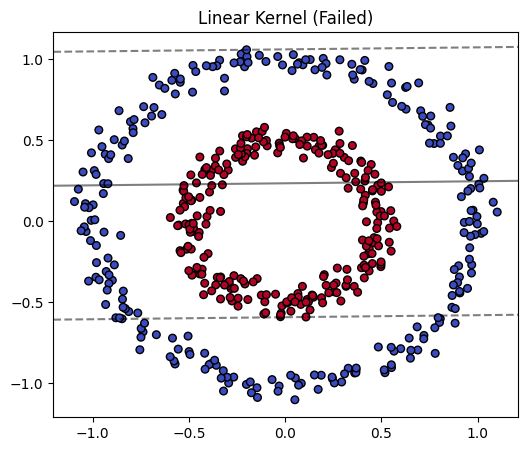

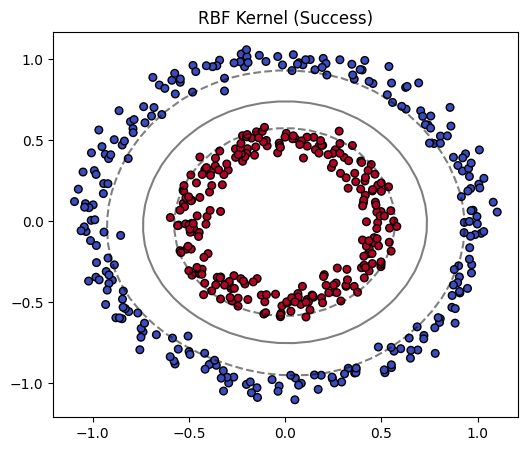

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import numpy as np

# 1. Generate "Donut" Data
# factor=0.5 means the inner circle is half the size of the outer one
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# 2. Function to visualize the "Street"
def plot_decision_boundary(model, title):
    plt.figure(figsize=(6, 5))
    # Plot data
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    # Create grid to verify the model's decision everywhere
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Get the decision boundary
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

# 3. ROUND 1: Linear Kernel (The Fail)
# It tries to draw a straight line through a circle.
clf_linear = SVC(kernel='linear')
clf_linear.fit(X, y)
plot_decision_boundary(clf_linear, "Linear Kernel (Failed)")

# 4. ROUND 2: RBF Kernel (The Magic)
# It lifts data to 3D and slices it.
clf_rbf = SVC(kernel='rbf', C=1.0)
clf_rbf.fit(X, y)
plot_decision_boundary(clf_rbf, "RBF Kernel (Success)")

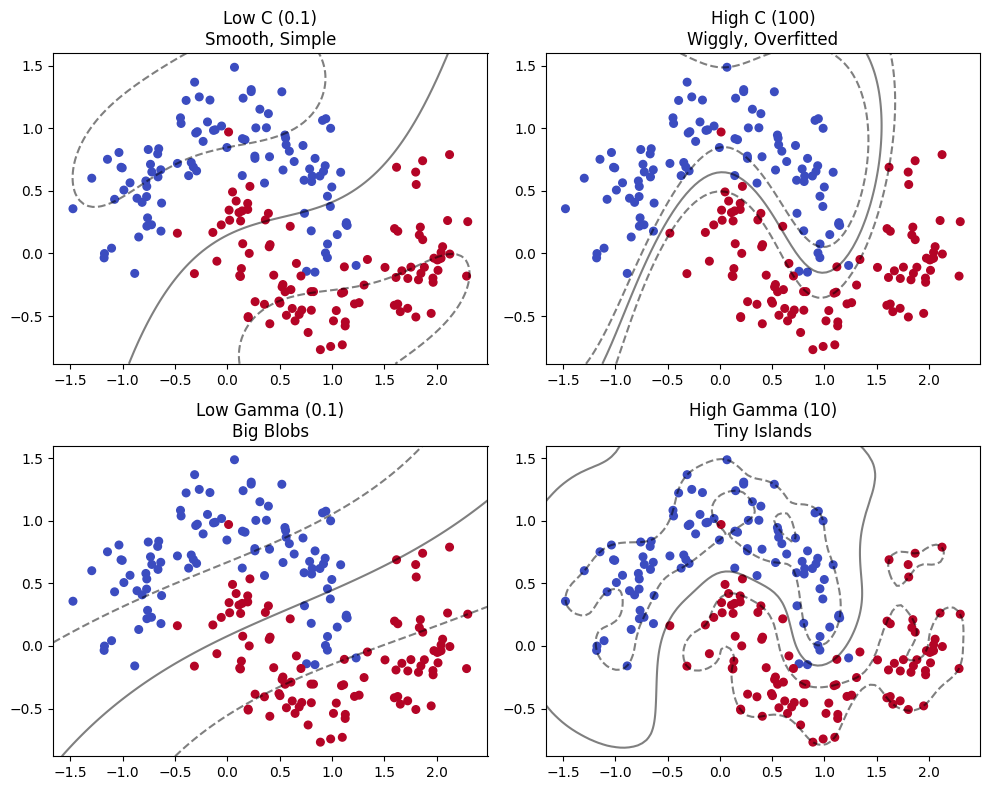

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# 1. Create Data (Moons again, because they are hard)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

def plot_svm(model, ax, title):
    # Train
    model.fit(X, y)

    # Plot Data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

    # Draw Boundary (The simplified version)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Draw the lines
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_title(title)

# 2. Set up the Experiment Grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Experiment A: Low C (Chill) vs High C (Strict)
plot_svm(SVC(kernel='rbf', C=0.1, gamma=0.5), axes[0,0], "Low C (0.1)\nSmooth, Simple")
plot_svm(SVC(kernel='rbf', C=100, gamma=0.5), axes[0,1], "High C (100)\nWiggly, Overfitted")

# Experiment B: Low Gamma (Far) vs High Gamma (Near)
plot_svm(SVC(kernel='rbf', C=1, gamma=0.1), axes[1,0], "Low Gamma (0.1)\nBig Blobs")
plot_svm(SVC(kernel='rbf', C=1, gamma=10), axes[1,1], "High Gamma (10)\nTiny Islands")

plt.tight_layout()
plt.show()

# **Naive Bayes **

In [ ]:
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load Data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Experiment A: Support Vector Machine (The Heavyweight)
start = time.time()
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_time = time.time() - start
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# 3. Experiment B: Naive Bayes (The Speedster)
start = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_time = time.time() - start
nb_acc = accuracy_score(y_test, nb.predict(X_test))

# 4. The Showdown
print(f"SVM Accuracy: {svm_acc:.2f} | Time: {svm_time:.5f} sec")
print(f"NB  Accuracy: {nb_acc:.2f} | Time: {nb_time:.5f} sec")

# Note: On a tiny dataset like Iris, time difference is small.
# On 1 million rows, SVM might take hours. NB takes seconds.

SVM Accuracy: 1.00 | Time: 0.01092 sec
NB  Accuracy: 1.00 | Time: 0.00612 sec


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# 1. The Data (Email Subjects)
# 1 = Spam, 0 = Not Spam
X_text = [
    "Win free money now",      # Spam
    "Meeting schedule update", # Not Spam
    "Free cash prize winner",  # Spam
    "Hey can we grab lunch",   # Not Spam
    "Limited time offer cash", # Spam
    "Project report due"       # Not Spam
]
y = [1, 0, 1, 0, 1, 0]

# 2. Turn Text into Numbers (The "Bag of Words")
# MultinomialNB NEEDS counts. It cannot read English.
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X_text)

# See what happened? It turned text into a matrix of counts.
# print(vectorizer.get_feature_names_out())
# print(X_counts.toarray())

# 3. Train the Model
model = MultinomialNB()
model.fit(X_counts, y)

# 4. Test it
new_emails = [
    "Win cash now",      # Should be Spam (1)
    "Lunch meeting time" # Should be Not Spam (0)
]
new_counts = vectorizer.transform(new_emails)
predictions = model.predict(new_counts)

print(f"Predictions: {predictions}")
# Output should be [1, 0] (Spam, Not Spam)

Predictions: [1 0]


## Real Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. The Data (A bit more data to make the split meaningful)
X_text = [
    "Win free money now", "Free cash prize", "Earn cash fast", "Lottery winner", # Spam
    "Meeting schedule", "Project report", "Lunch plan", "Weekly update",        # Not Spam
    "Click here for money", "Urgent business proposal",                         # Spam
    "Mom called you", "Lets go for dinner"                                      # Not Spam
]
y = [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0] # 1=Spam, 0=Not Spam

# 2. SPLIT FIRST (80% Train, 20% Test)
# We split the RAW text strings.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

# 3. Vectorize (The "Bag of Words")
vectorizer = CountVectorizer()

# CRITICAL STEP:
# Fit on TRAIN only. Then just Transform TEST.
# This ensures the model never sees the "vocabulary" of the test set.
X_train_counts = vectorizer.fit_transform(X_train_raw)
X_test_counts = vectorizer.transform(X_test_raw)

# 4. Train Model (MultinomialNB)
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# 5. Evaluate
y_pred = model.predict(X_test_counts)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# See what it got right/wrong
print(f"Test Inputs: {X_test_raw}")
print(f"Predictions: {y_pred}")
print(f"Actuals:     {y_test}")

Accuracy: 66.67%
Test Inputs: ['Mom called you', 'Urgent business proposal', 'Win free money now']
Predictions: [0 0 1]
Actuals:     [0, 1, 1]
